In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
import random

In [2]:
class AgentState(TypedDict):
    name: str
    counter : int
    numbers : List[int]



In [4]:
def greetings_node(state: AgentState) -> AgentState:
    state['name'] = f"Hi, {state['name']}!"
    state['counter'] = 0
    state['numbers'] = []
    return state

def increment_node(state: AgentState) -> AgentState:
    state['counter'] += 1
    state['numbers'].append(random.randint(1, 100))
    return state

def decide_next_node(state: AgentState) -> str:
    if state['counter'] < 5:
        return 'increment'
    else:
        return 'end'

In [6]:
graph = StateGraph(AgentState)

graph.add_node("greetings", greetings_node)
graph.add_node("random_node", increment_node)

graph.add_conditional_edges(
    "random_node",
    decide_next_node,
    {
        'increment': 'random_node',
        'end': END
    }
)
graph.add_edge(START, "greetings")
graph.add_edge("greetings", "random_node")
graph.add_edge("random_node", END)

app = graph.compile()

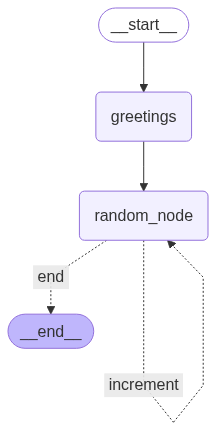

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state = AgentState(name="Alice", counter=-2, numbers=[])
print(app.invoke(initial_state))

{'name': 'Hi, Alice!', 'counter': 5, 'numbers': [18, 48, 27, 93, 44]}
